# Timing Benchmarks

This example benchmarks timing performance for the estimation and control algorithms in Sia for a linear system with random matrix entries.  Algorithm parameters are held fixed and the number of states is increased.  The timing performance is meant to provide a benchmark for comparison.  In reality, times will differ per platform.  A few caveats to keep in mind:

- The sampling-based algorithms use a fixed number of samples so they tend to outperform the linear/gradient-based algorithms at high dimensions.  Several choices of samples are shown.  In practice sampling-based algorithms perform poorly in high dimensions, so carefully weigh the algorithm performance vs the evaluation time.

- The linearization algorithms (iLQR, EKF) perform nearly identically to the optimal (LQR, KF) because the system is linear.  For nonlinear variants, the iLQR will likely exhibit several iterations, which will increase compute time.

- MPC algorithms are shown for a fixed horizon.  In reality the horizon needs to be adjusted to acheive good performance and will result in an increase in compute time if increased.

To benchmark Sia algorithms on your system, build and install the C++ and Python libraries from the main README instructions.  Start the docker container.
```
# Run the benchmark code, depending on the system this could take a few minutes
cd /libsia/bin
./example-benchmarks --datafile /libsia/data/benchmarks.csv
```

When the executable is complete, run the following code

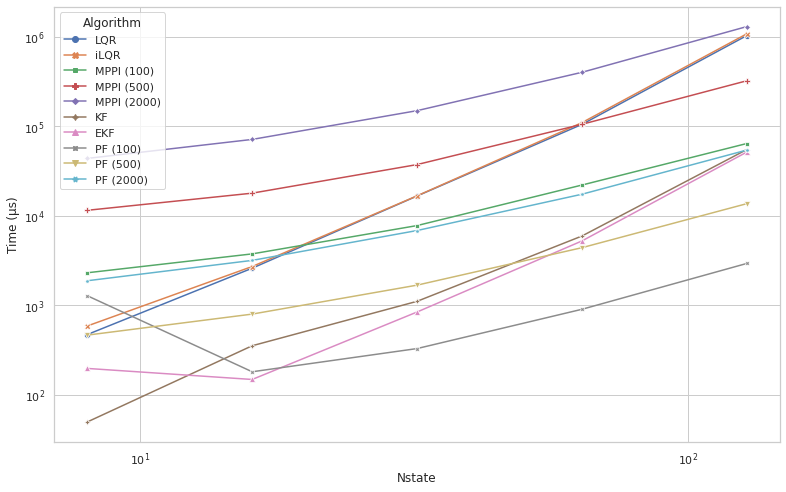

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the data file generated
filename = "/libsia/data/benchmarks.csv"
df = pd.read_csv(filename)

# Plot the average evaluation times
f, ax = plt.subplots(1, 1, sharex=True, figsize=(13, 8))
sns.lineplot(ax=ax, data=df, x="Nstate", y="Time (µs)", hue="Algorithm",
             style="Algorithm", markers=True, dashes=False)
ax.set_yscale("log")
ax.set_xscale("log")